In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pylab
# Рисуем графики не создавая новых окон
%matplotlib inline
import random
def generateSimpleBollobasRiordanGraph(n):
    G = nx.MultiDiGraph()
    G.add_node(0)
    G.add_edge(0, 0)
    # список всех вершин графа, каждая из них входит в него в количестве, равном её степени
    repeated_nodes = [0, 0]
    while G.number_of_nodes() < n:
        new_node = G.number_of_nodes()
        G.add_node(new_node)
        # для возможности петли
        repeated_nodes.append(new_node)
        # выбираем конец ребра пропорционально степени вершины
        destination = random.choice(repeated_nodes)
        repeated_nodes.append(destination)
        G.add_edge(new_node, destination)
    return G

def generateBollobasRiordanGraph(n, m):
    G1mn = generateSimpleBollobasRiordanGraph(m * n)
    G = nx.MultiDiGraph()
    # объединяем вершины в последовательные группы по m: {0,...,m-1}, {m, ..., 2m-1}, ..., {m(n-1), ..., mn - 1}
    for u, v in G1mn.edges():
        u_new, v_new = u / m, v / m
        G.add_edge(u_new, v_new)
    return G

#### Задача 1
Исследуйте применимость функций networkx.transitivity и networkx.average_clustering. Реализуйте функцию подсчета локального кластерного коэффициента для ориентированного графа без петель и кратных ребер. Сгенерируйте при $n=100, 200,\ldots, 10000$ последовательность графов Боллобаша-Риордана $\{G_3^n\}$ и постройте в двух случаях график локального и глобального кластерного коэффициента:

* графы рассматриваются без ориентации, кратных ребер и петель;
* графы рассматриваются без кратных ребер и петель, но с ориентацией.

Насколько результат подтверждает гипотезу о том, что в таких графах локальный кластерный коэффициент в константу раз больше транзитивности?

Сравните результаты функции networkx.approximation.average_clustering и networkx.average_clustering при большом числе вершин в графе.

In [3]:
G = generateBollobasRiordanGraph(10000, 3)

In [7]:
print nx.transitivity(nx.DiGraph(G))
print nx.transitivity(nx.Graph(G))
# print nx.transitivity(G)   not defined for multigraphs
print nx.average_clustering(nx.Graph(G))
# print nx.average_clustering(nx.DiGraph(G))   not defined for directed graphs

from networkx.algorithms import approximation
print approximation.average_clustering(nx.Graph(G), trials=100)
print approximation.average_clustering(nx.Graph(G), trials=1000)
print approximation.average_clustering(nx.Graph(G), trials=10000)
print approximation.average_clustering(nx.Graph(G), trials=100000)

0.0121832685347
0.00293307189859
0.0085389688077
0.0
0.009
0.0084
0.00847


In [5]:
H = nx.DiGraph()
H.add_edge(1, 2)
H.add_edge(1, 0)
H.add_edge(2, 0)
# H.add_edge(0, 2)
print nx.transitivity(H)

0.5


Функция networkx.average_clustering не определена для ориентированных графов. Поэтому реализуем ее отдельно. Определение локального кластерного коэффициента вершины в этом случае отличается только нормировкой:
$$
C_v = \frac{|\{(x,y) \in E: ~ x,y \in N_v\}|}{n_v(n_v-1)},
$$
поскольку максимальное число различных ребер между $n_v$ соседями вершины $v$ равно $n_v(n_v-1).$

In [9]:
from itertools import permutations
def local_clustering_directed(G, v):
    number_of_edges = 0
    nv = len(G.neighbors(v))
    if nv <= 1:
        return 1
    for (x, y) in permutations(G.neighbors(v), 2):
        if x in G.neighbors(y):
            number_of_edges += 1
    return float(number_of_edges) / nv / (nv - 1)

In [10]:
def average_local_clustering_directed(G):
    res = 0
    for v in G.nodes():
        res += local_clustering_directed(G, v)
    return res / float(G.order())

In [19]:
di_graph_t = []  # значения транзитивности в случае с ориентацией
di_graph_ac = [] # значения среднего лок. к.к. в случае с ориентацией
t = []           # значения транзитивности в случае без ориентации
ac = []          # значения среднего лок. к.к. в случае без ориентации
ns = []          # количества вершин
for N in xrange(100, 10000, 100):
    G = generateBollobasRiordanGraph(N, 3)
    ns.append(N)
    t.append(nx.transitivity(nx.Graph(G)))
    ac.append(nx.average_clustering(nx.Graph(G)))
    di_graph_t.append(nx.transitivity(nx.DiGraph(G)))
    di_graph_ac.append(average_local_clustering_directed(nx.DiGraph(G)))


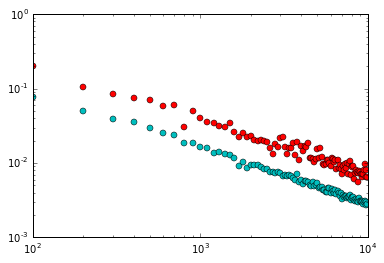

In [21]:
# неориентированный случай
plt.loglog(ns, t, ls='None',marker='o', color='c')  # транзитивность
plt.loglog(ns, ac, ls='None',marker='o', color='r')  # средний локальный кластерный коэффициент
plt.show()

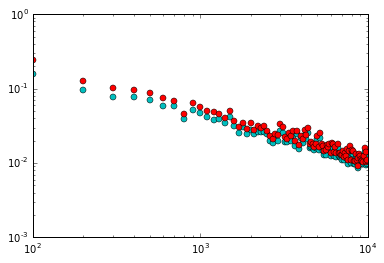

In [22]:
# ориентированный случай
plt.loglog(ns, di_graph_t, ls='None',marker='o', color='c')  # транзитивность
plt.loglog(ns, di_graph_ac, ls='None',marker='o', color='r')  # средний локальный кластерный коэффициент

plt.show()

In [12]:
G = nx.DiGraph()
G.add_edge(1, 2)
G.add_edge(1, 0)
G.add_edge(2, 0)
# G.add_edge(0, 2)
print local_clustering_directed(G, 0)
print local_clustering_directed(G, 1)
print local_clustering_directed(G, 2)
print average_local_clustering_directed(G)

1
0.5
1
0.833333333333


<img src="image.png">